In [54]:
%matplotlib inline

import random
import scipy.stats as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
def radius(x):
    return sum([i ** 2 for i in x])

In [10]:
def visualise(ax, dimension, num_points, generator, title=""):
    ax.set_title(title)
    ax.scatter(*generator(dimension, n).transpose(), marker = '.', color='midnightblue')       
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    if dimension == 3:
        ax.set_xlim(-1.1, 1.1)
        ax.set_ylim(-1.1, 1.1)
        ax.set_zlim(-1.1, 1.1)

# Muller, Marsaglia's method

Let's take $X$ - an n-dimensional vector of normal deviates (it suffices to use $N(0, 1)$).

Radius of $X$ is calculated as $r = \sqrt{ x_1^2 + x_2^2 + \dots + x_n^2}$

$\frac{1}{r}X$ is uniformly distributed over the surface of the unit n-ball ($(n-1)$-sphere)

## *$(n-1)$-sphere*

In [6]:
def generate_Muller(n, count):
    lst = sp.norm.rvs(0, 1, size=(count, n))
    points = np.array([x / np.sqrt(radius(x)) for x in lst])
    return points

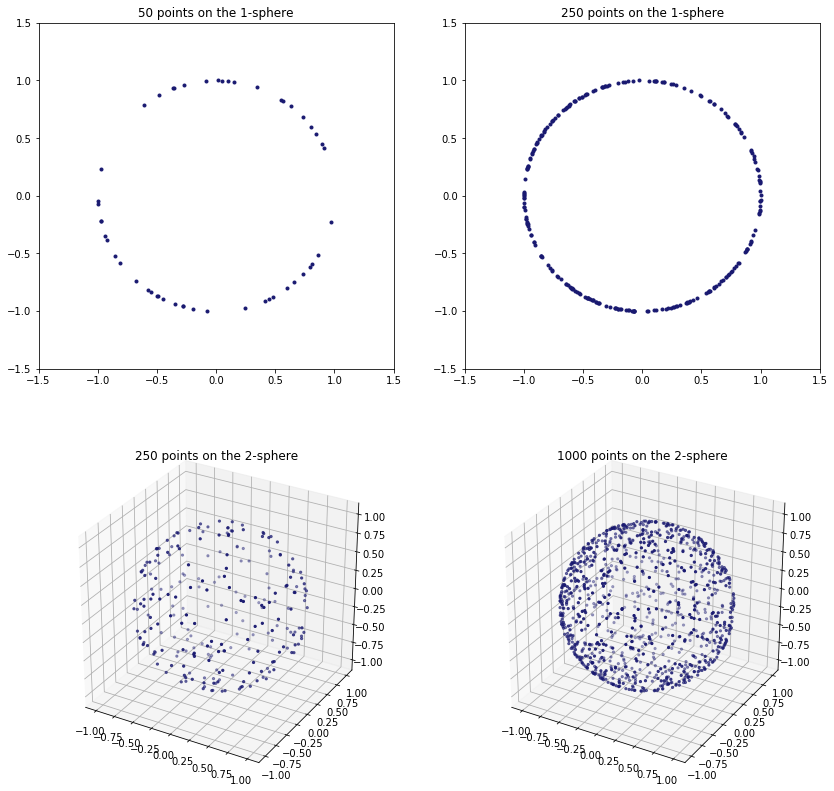

In [26]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([50, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_Muller, "{} points on the {}-sphere".format(n, 1))
    
for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_Muller, "{} points on the {}-sphere".format(n, 2))

In [106]:
%%timeit
generate_Muller(2, 1000)

6.07 ms ± 95.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
%%timeit
generate_Muller(3, 1000)

6.61 ms ± 83.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## *$N$-ball*

If u is a number generated uniformly at random from the interval $\left[0, 1\right]$ and $X$ is a point selected uniformly at random from the unit $(n - 1)$-sphere (e.g. obtained by Marsaglia's algorithm), then $\sqrt[n]{u}X$ is uniformly distributed within the unit n-ball.

In [22]:
def generate_Muller_ball(n, count):
    points = generate_Muller(n, count)
    u = np.power(sp.uniform.rvs(0, 1, size=count), 1 / n)
    return np.array([r * p for r, p in zip(u, points)])


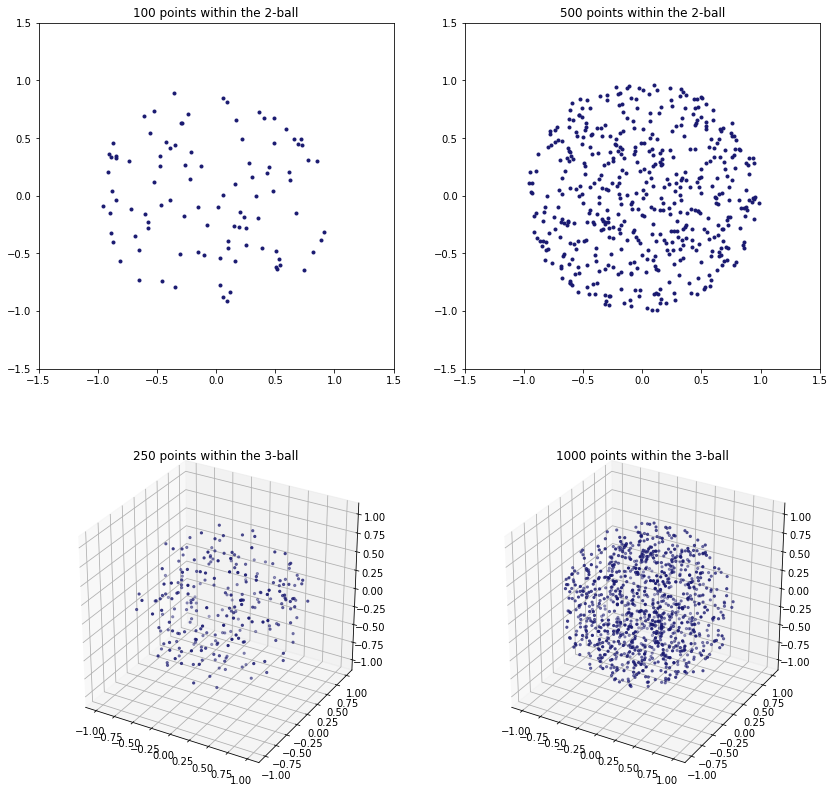

In [27]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_Muller_ball, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_Muller_ball, "{} points within the {}-ball".format(n, 3))

In [108]:
%%timeit
generate_Muller_ball(2, 1000)

8.21 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
%%timeit
generate_Muller_ball(3, 1000)

8.75 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Rejection method

## *N-ball*

If $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq U(-1, 1), i=\overline{1, n}$ - a uniformly randomly chosen point in the unit n-cube. The point is rejected and resampled if r > 1 (i.e., if the point is not in the n-ball), otherwise $X$ is uniformly distributed within the unit n-ball.

In [100]:
def generate_rejection(n, count):
    points = []
    for i in range(count):
        r = 2
        while r > 1:
            point = []
            for _ in range(n):
                point.append(1 - 2 * random.random())
            r = radius(point)
        points.append(point)
    
    return np.array(points)

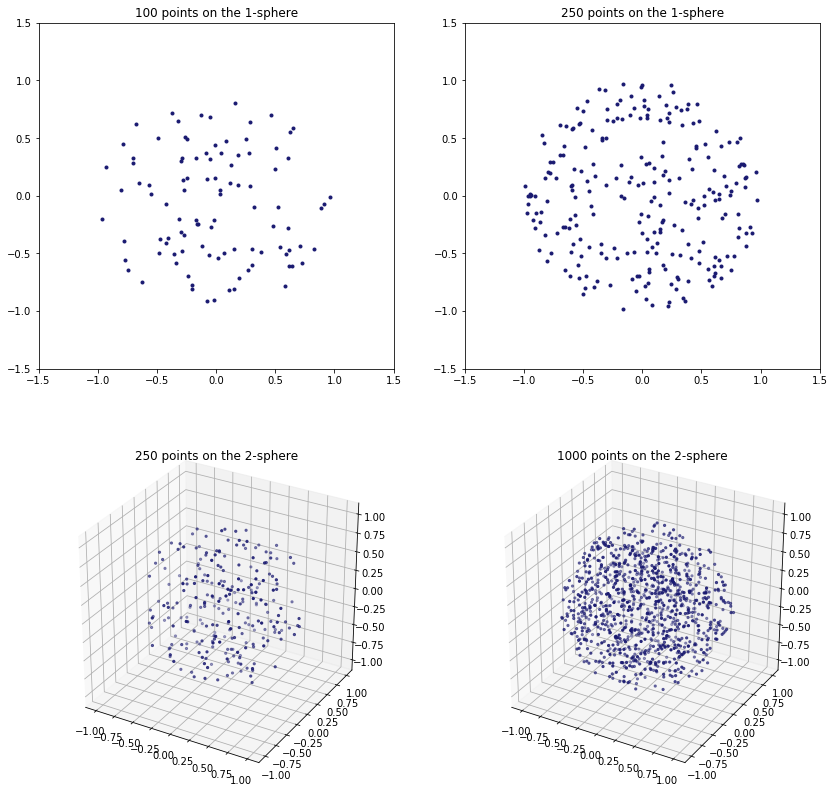

In [101]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_rejection, "{} points on the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_rejection, "{} points on the {}-ball".format(n, 3))

In [111]:
%%timeit
generate_rejection(2, 1000)

2.11 ms ± 31.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [112]:
%%timeit
generate_rejection(3, 1000)

3.58 ms ± 64.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
%%timeit
generate_Muller(4, 1000)

7.07 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## *(N-1)-sphere*

If $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq U(-1, 1), i=\overline{1, n}$ - a uniformly randomly chosen point in the unit n-cube. The point is rejected and resampled if r > 1 (i.e., if the point is not in the n-ball), otherwise $\frac{1}{r}X$ is uniformly distributed on the unit (n-1)-sphere.

In [103]:
def generate_rejection_sphere(n, count):
    points = []
    for i in range(count):
        r = 2
        while r > 1:
            point = []
            for _ in range(n):
                point.append(1 - 2 * random.random())
            r = radius(point)
        points.append(point / np.sqrt(r))
    
    return np.array(points)

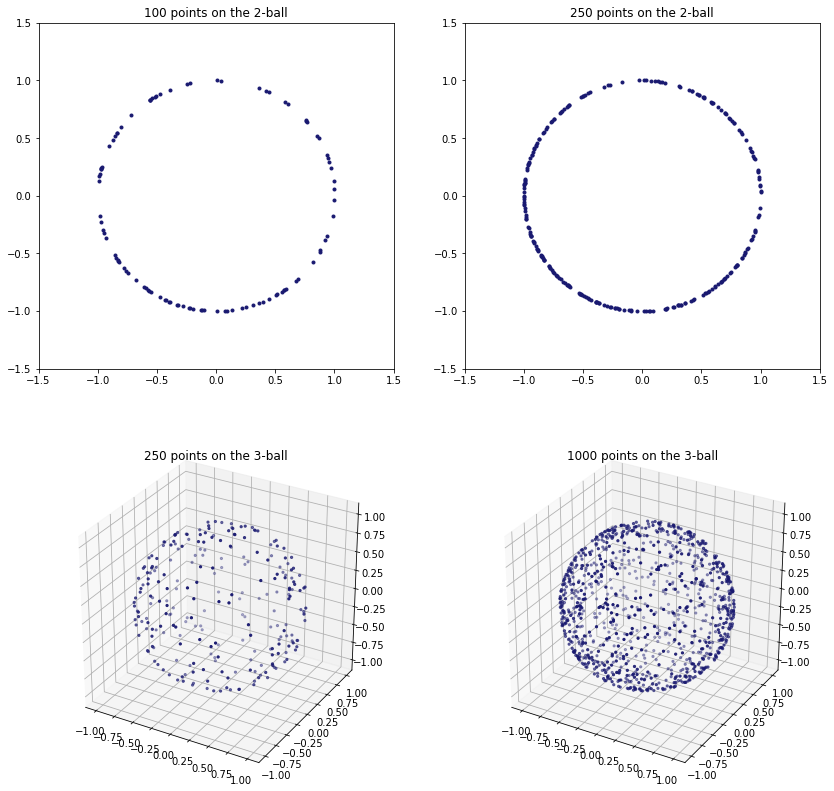

In [35]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_rejection_sphere, "{} points on the {}-sphere".format(n, 1))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_rejection_sphere, "{} points on the {}-sphere".format(n, 2))

In [117]:
%%timeit
generate_rejection_sphere(2, 1000)

6.88 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
%%timeit
generate_rejection_sphere(3, 1000)

8.42 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Exponential distribution (for N-balls)

Let $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq Norm(0, 1)$ , $i=\overline{1, n} $

If $e \simeq Expon(1)$, then $\frac{1}{d}X$ is uniformly distributed in n-sphere, where $d = \sqrt{ e + x_1^2 + x_2^2 + \dots + x_n^2}$


In [118]:
def generate_expon(n, count):
    X = sp.norm.rvs(0, 1, size=(count, n))
    e = sp.expon.rvs(1, size=count)
    denom = (e + np.sum(X**2, axis=1))**0.5 
    return np.array([x / d for x, d in zip(X, denom)])


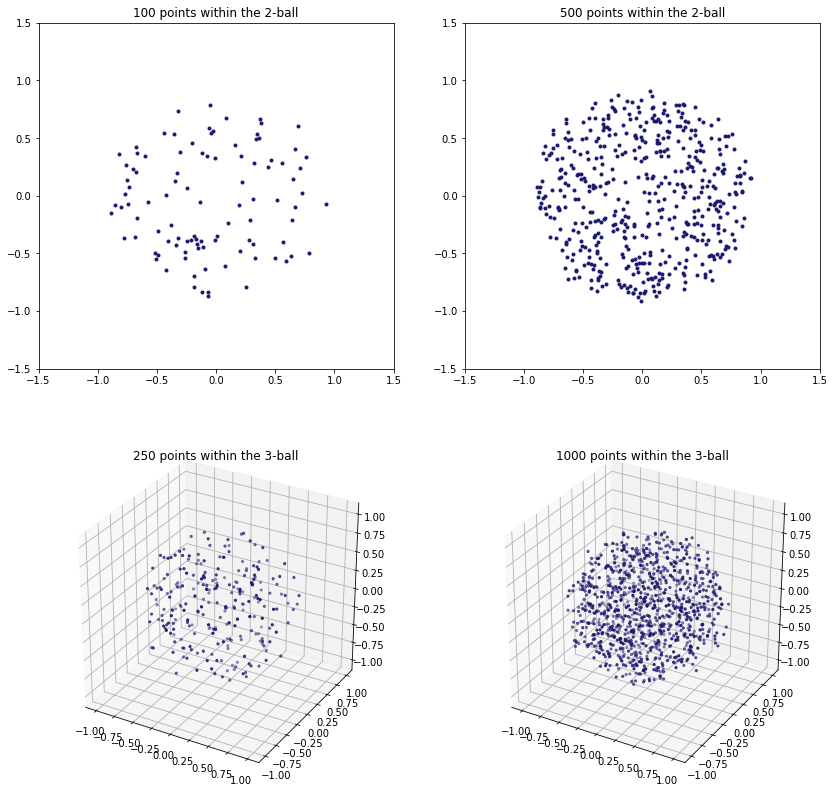

In [119]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_expon, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_expon, "{} points within the {}-ball".format(n, 3))

In [120]:
%%timeit
generate_expon(2, 1000)

2.29 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [121]:
%%timeit
generate_expon(3, 1000)

2.31 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [145]:
%%timeit
generate_expon(100, 1000)

5.31 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [135]:
def generate_expon_sphere(n, count):
    points = generate_expon(n, count)
    return np.array([x / np.sqrt(radius(x)) for x in points])

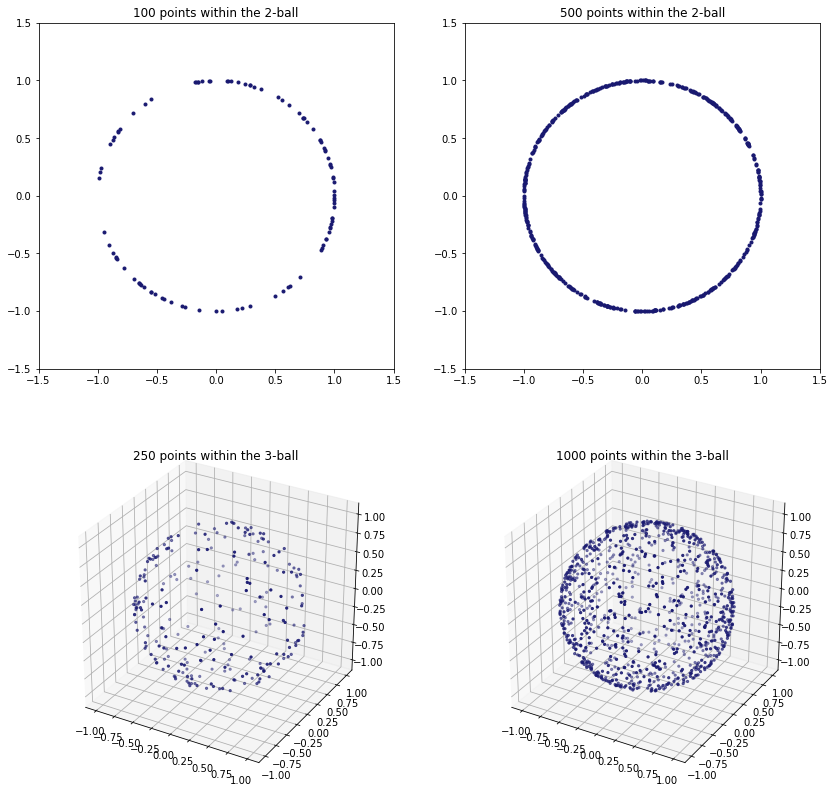

In [136]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_expon, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_expon, "{} points within the {}-ball".format(n, 3))

In [137]:
%%timeit
generate_expon_sphere(2, 1000)

8.35 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [138]:
%%timeit
generate_expon_sphere(3, 1000)

8.72 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [143]:
%%timeit
generate_expon_sphere(10, 1000)

12.6 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Method von Neumann / Cook
**For N = 2**: Generate $X_1, X_2 \simeq U[-1, 1]$ until $R = X_1^2 + X_2^2 < 1$. Then $$\left(\frac{X_1^2 - X_2^2}{R}, \frac{2X_1 X_2}{R}\right)$$ is uniformly distributed over $1$-sphere.

**For N = 3**: Generate $X = (X_1, X_2, X_3, X_4), \: X_i \simeq U[-1, 1], i=\overline{1,4}$, until $\|X\| \geq 1 $. Then 
$$ \left(\frac{2 (X_2 X_4 + X_1 X_3)}{\|X\| ^ 2},\:
         \frac{2 (X_3 X_4 - X_1 X_2)}{\|X\| ^ 2},\:
         \frac{X_1^2 + X_4^2 - X_2^2 - X_3^2}{\|X\| ^ 2}\right) $$ - is uniformly distributed over $2$-sphere.

In [64]:
def generate_Neumann(n, count):
    points = []
    for _ in range(count):
        r = 2
        while r >= 1:
            x, y = 1 - 2 * random.random(), 1 - 2 * random.random()
            r = x ** 2 + y ** 2
        points.append([(x ** 2 - y ** 2) / r, 2 * x * y / r])
    return np.array(points)

In [71]:
def generate_Cook(n, count):
    points = []
    for _ in range(count):
        r = 2
        while r >= 1:
            x1, x2, x3, x4 = 1 - 2 * random.random(),\
                             1 - 2 * random.random(),\
                             1 - 2 * random.random(),\
                             1 - 2 * random.random()
            r = x1 ** 2 + x2 ** 2 + x3 ** 2 + x4 ** 2
        points.append([2 * (x2 * x4 + x1 * x3) / r,
                       2 * (x3 * x4 - x1 * x2) / r,
                       (x1 ** 2 + x4 ** 2 - x2 ** 2 - x3 ** 2) / r])
    return np.array(points)

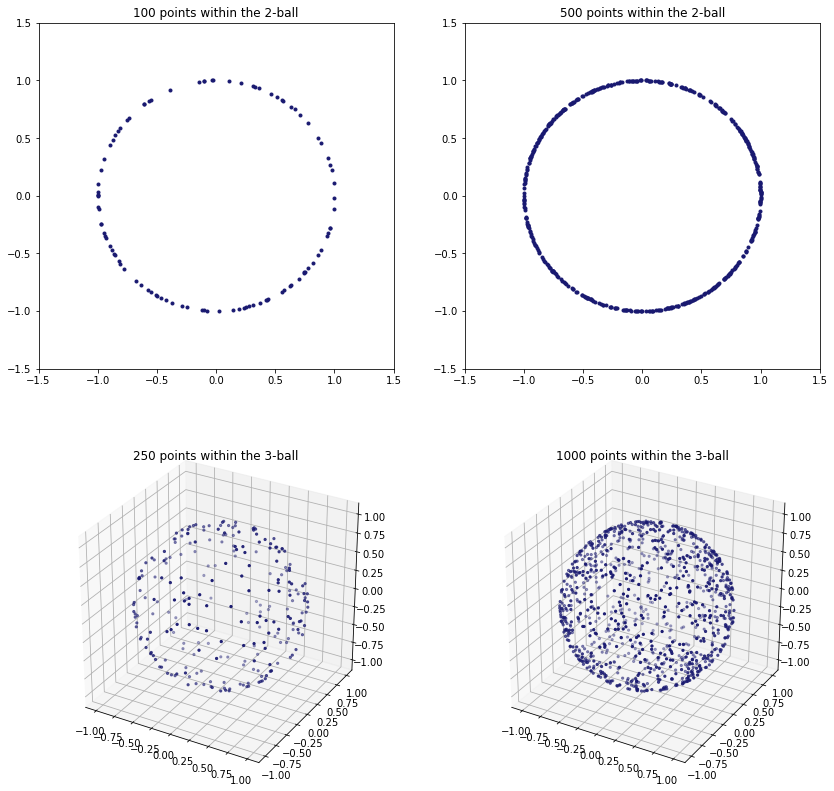

In [72]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_Neumann, "{} points within the {}-sphere".format(n, 1))
    
for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_Cook, "{} points within the {}-sphere".format(n, 2))

In [124]:
%%timeit
generate_Neumann(2, 1000)

1.32 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [125]:
%%timeit
generate_Cook(3, 1000)

4.19 ms ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Dropped coordinates (N-balls)

If $X = (x_1, x_2, \dots, x_n, x_{n+1}, x_{n+2})$ - a random vector uniformly distributed on the $(n+1)-sphere$, then $X' = (x_1, x_2, \dots, x_n)$ is s uniformly distributed in the $N-ball$.

In [73]:
def generate_dropped(n, count):
    points = generate_Muller(n+2, count)
    return points[:,:-2]

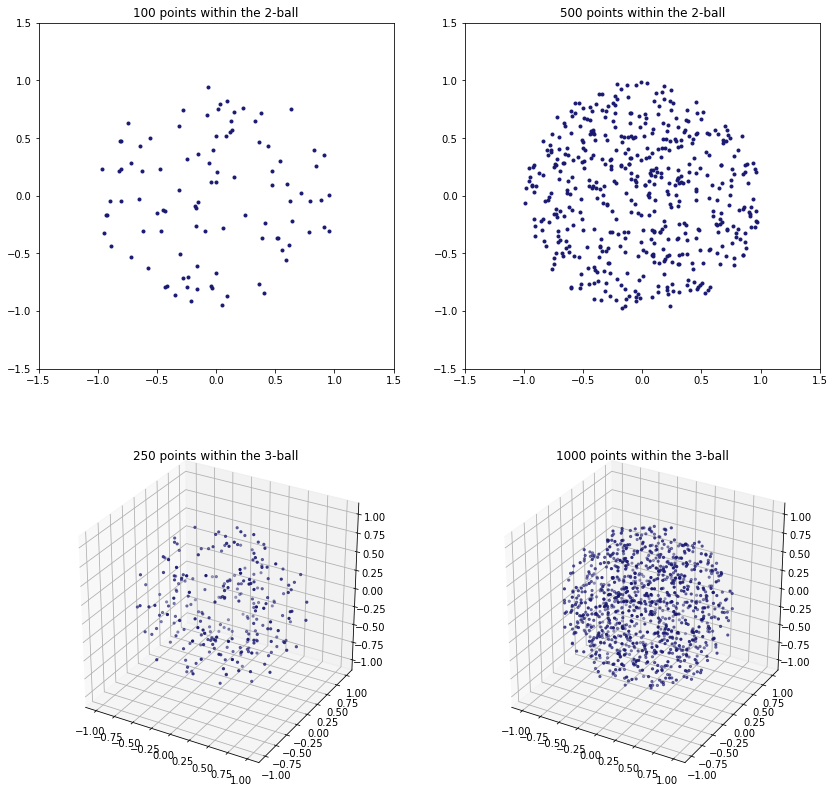

In [88]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_dropped, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_dropped, "{} points within the {}-ball".format(n, 3))

In [128]:
%%timeit
generate_dropped(2, 1000)

7.24 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [129]:
%%timeit
generate_dropped(3, 1000)

7.89 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Marsaglia's method
Generate $X = (X_1, X_2),\: X_i \simeq U[-1, 1], i=1,2$, until $R = X_1^2 + X_2^2 < 1$. Then uniformly random point on $2$-sphere:
$$X' = (2X_1\sqrt{1 - R},\: 2X_2\sqrt{1 - R},\: 1 - 2R)$$

In [80]:
def generate_Marsaglia(n, count):
    points = []
    for _ in range(count):
        r = 2
        while r >= 1:
            x, y = 1 - 2 * random.random(), 1 - 2 * random.random()
            r = x ** 2 + y ** 2
        points.append([2 * x * np.sqrt(1 - r), 2 * y * np.sqrt(1 - r), 1 - 2 * r])
    return np.array(points)

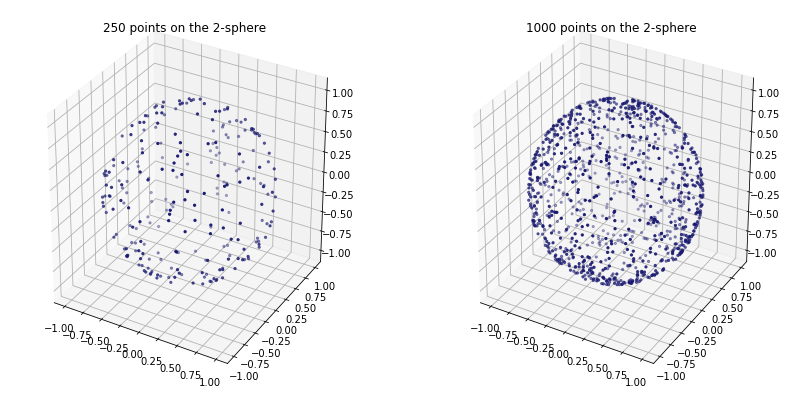

In [83]:
fig = plt.figure(figsize=(14, 7))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(1,2,i+1, projection='3d'), 3, n,
              generate_Marsaglia, "{} points on the {}-sphere".format(n, 2))

In [130]:
%%timeit
generate_Marsaglia(3, 1000)

3.38 ms ± 53.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Polar method

In [84]:
def generate_polar_sphere(n, count):
    if n == 2:
        theta = sp.uniform.rvs(0, 2 * np.pi, size=count)
        return np.array([[np.cos(t), np.sin(t)] for t in theta])
    elif n == 3:
        theta = sp.uniform.rvs(0, 2 * np.pi, size=count)
        phi = np.arccos(sp.uniform.rvs(-1, 2, size=count))
        return np.array([[np.cos(t) * np.sin(p),
                          np.sin(t) * np.sin(p),
                          np.cos(p)] for t, p in zip(theta, phi)])
    

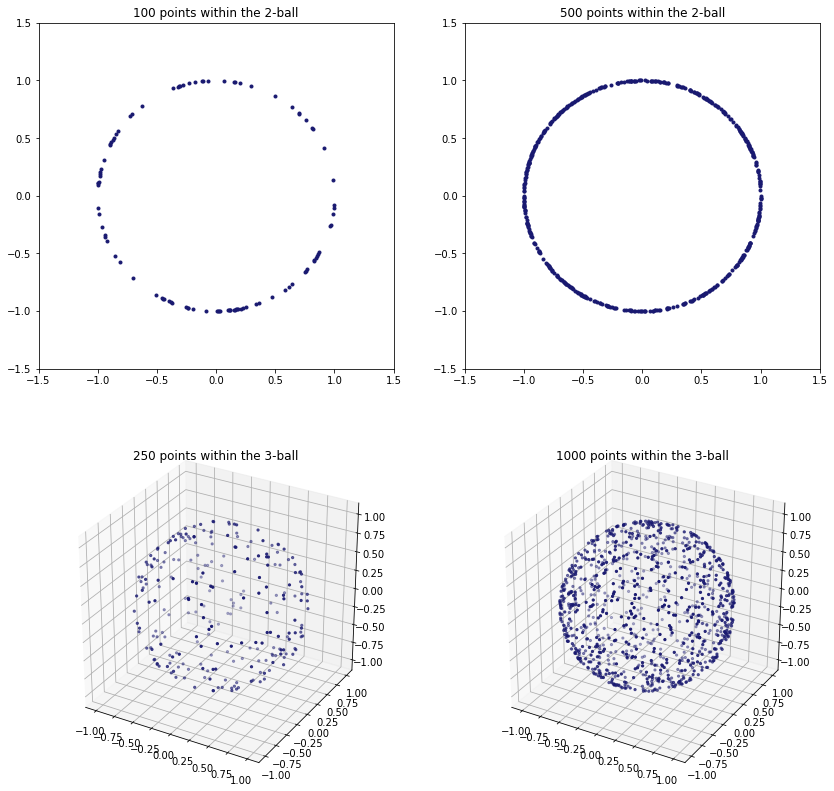

In [85]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_polar_sphere, "{} points within the {}-sphere".format(n, 1))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_polar_sphere, "{} points within the {}-sphere".format(n, 2))

In [131]:
%%timeit
generate_polar_sphere(2, 1000)

3.25 ms ± 61.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [132]:
%%timeit
generate_polar_sphere(3, 1000)

7.65 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
def generate_polar_ball(n, count):
    points = generate_polar_sphere(n, count)
    u = np.power(sp.uniform.rvs(0, 1, size=count), 1 / n)
    return np.array([point * _ for point, _ in zip(points, u)])

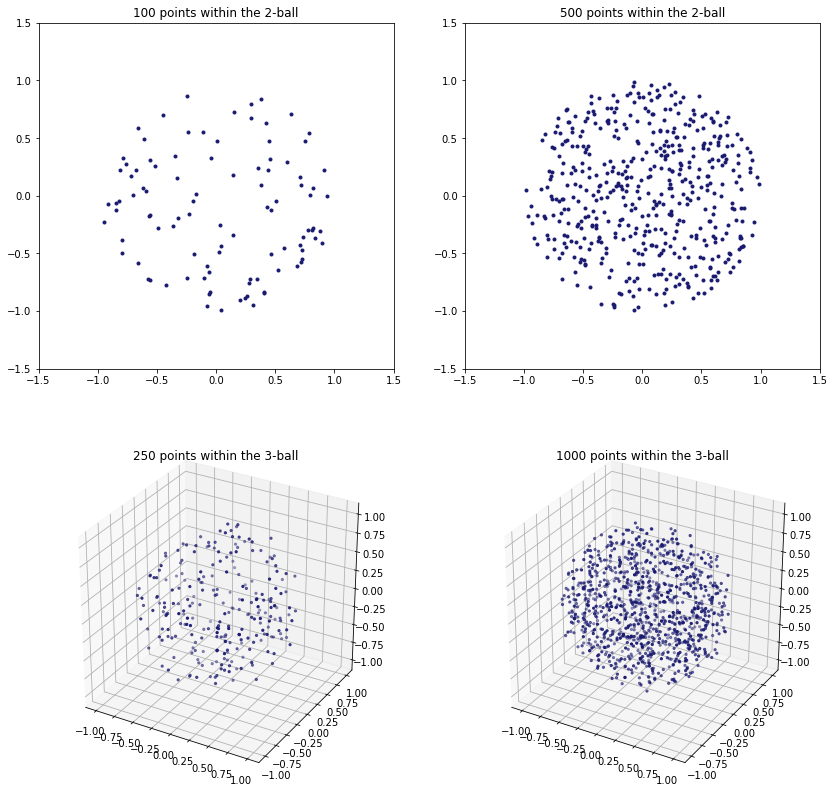

In [87]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_polar_ball, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_polar_ball, "{} points within the {}-ball".format(n, 3))

In [133]:
%%timeit
generate_polar_ball(2, 1000)

5.41 ms ± 93.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [134]:
%%timeit
generate_polar_ball(3, 1000)

9.79 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
